In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from functools import reduce
import collections
from matplotlib.ticker import AutoMinorLocator
import matplotlib.ticker as ticker
#import pixiedust

In [2]:
#%%pixie_debugger
path = '/media/DATA/serbulent/Code/Thesis/ReviewPaper/embedding_similarity/Results'

first = False
similarity_table = pd.DataFrame(columns=['aspect', 'cosineCorr', 'cosineCorrPVal',\
                                         'manhattanCorr','manhattanCorrPVal','euclidianCorr','euclidianCorrPVal'])

pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows = 4000



for filename in sorted(glob.glob(os.path.join(path, '*.csv'))):
    #print(filename)
    try:
        embedding_name = filename.split('Similarity')[1].replace('.csv', '')
        if "Bert" or "Apaac" or "KSEP" in embedding_name:
            newEmbeddings = True
        else:
            newEmbeddings = False
        if embedding_name != '_Table' :
            similarity_table = similarity_table.append(pd.Series(name=embedding_name))
            tmp_table = pd.read_csv(filename)
            tmp_table = tmp_table.iloc[:,:7]
            # We calculate 1-cos for similarity correlation in higest_* data sets so we need to fix
            if "highest" in embedding_name:
                tmp_table.iloc[:,1] = -(tmp_table.iloc[:,1])
            # We calculate manhattan and eucldian distance directly for similarity 
            #correlation in noraml data sets so we need to fix
            elif newEmbeddings == False:
                tmp_table.iloc[:,3] = -(tmp_table.iloc[:,3])
                tmp_table.iloc[:,5] = -(tmp_table.iloc[:,5])

            new_cols = {x: y for x, y in zip(tmp_table.columns,similarity_table.columns)}
            similarity_table = similarity_table.append(tmp_table.rename(columns=new_cols))
    except:
        pass
similarity_table.to_csv("Similarity_Table.csv")

In [3]:
similarity_table

,aspect,cosineCorr,cosineCorrPVal,manhattanCorr,manhattanCorrPVal,euclidianCorr,euclidianCorrPVal
Apaac_200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MF,0.043015,1.275232e-09,0.092875,2.242384e-39,0.073157,4.980174e-25
1,BP,0.035967,3.871851e-07,0.067607,1.328245e-21,0.069908,5.437904e-23
2,CC,0.097799,1.715485e-43,0.057446,5.063387e-16,0.072988,6.391653e-25
Apaac_500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MF,0.043243,4.205616e-52,0.046370,1.196539e-59,0.035068,7.496809e-35
1,BP,0.018557,7.249097e-11,0.045308,5.004153e-57,0.045637,7.853139e-58
2,CC,0.047683,1.756869e-62,0.039365,3.873951e-43,0.046890,1.772014e-60
Apaac_All,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,MF,0.047199,0.000000e+00,-0.012836,1.315971e-171,-0.009300,5.175585e-91


In [4]:
#%%pixie_debugger
def drawEmbeddingSimilarity(measure):
    SimilarityCorrDf = pd.DataFrame(columns=["Type","Aspect", "Apaac","Gene2Vec", "KSEP", "LearnedEmbeddingVec",\
                                             "Mut2Vec","ProtVec","SeqVec"\
                                           ,"TCGA_Embedding","Tape_Bertavg","Tape_Bertpool","UniRep"])
    #SimilarityCorrDf.rename(index={0:'All_Proteins',1:'Well_Annotated_500',2:'Well_Annotated_200',3:'Sparse_Uniform'}, inplace=True)
    rowIndex = 0
    for aspect in ["MF","BP","CC"]:
        rowDictSparse_Uniform = {}
        rowDictSparse_Uniform['Type'] = "Sparse_Uniform"
        rowDictWell_Annotated_500 = {}
        rowDictWell_Annotated_500['Type'] = "Well_Annotated_500"
        rowDictWell_Annotated_200 = {}
        rowDictWell_Annotated_200['Type'] = "Well_Annotated_200"
        rowDictAll_Proteins = {}
        rowDictAll_Proteins['Type'] = "All_Proteins"
        for index, row in similarity_table.iterrows(): 
            #print(rowDict)
            if isinstance(index, str):
                embedding = index.split("_")
                embedding_name = embedding[0]
                embedding_type = '_'.join(embedding[1:])
                if "Tape" in embedding or "TCGA" in embedding:
                    embedding_name = '_'.join(embedding[0:2])
                    embedding_type = '_'.join(embedding[2:])
            elif row['aspect'] == aspect:
                if "Sparse" in embedding_type:           
                    rowDictSparse_Uniform['Aspect'] = aspect
                    rowDictSparse_Uniform[embedding_name] = row[measure]
                elif "500" in embedding_type and "Sparse" not in embedding_type:
                    rowDictWell_Annotated_500['Aspect'] = aspect
                    rowDictWell_Annotated_500[embedding_name] = row[measure]
                elif "200" in embedding_type:             
                    rowDictWell_Annotated_200['Aspect'] = aspect
                    rowDictWell_Annotated_200[embedding_name] = row[measure]
                else:
                    rowDictAll_Proteins['Aspect'] = aspect
                    rowDictAll_Proteins[embedding_name] = row[measure]
        SimilarityCorrDf = SimilarityCorrDf.append(rowDictSparse_Uniform, ignore_index=True)
        SimilarityCorrDf = SimilarityCorrDf.append(rowDictWell_Annotated_500, ignore_index=True)
        SimilarityCorrDf = SimilarityCorrDf.append(rowDictWell_Annotated_200, ignore_index=True)
        SimilarityCorrDf = SimilarityCorrDf.append(rowDictAll_Proteins, ignore_index=True)
        rowIndex = rowIndex + 1
    return SimilarityCorrDf

In [5]:
drawEmbeddingSimilarity('cosineCorr')

,Type,Aspect,Apaac,Gene2Vec,KSEP,LearnedEmbeddingVec,Mut2Vec,ProtVec,SeqVec,TCGA_Embedding,Tape_Bertavg,Tape_Bertpool,UniRep
0,Sparse_Uniform,MF,-0.003388,0.074289,0.152288,0.459383,0.539638,-0.062864,0.370601,0.039360,0.457840,0.408571,0.604904
1,Well_Annotated_500,MF,0.043243,0.057953,0.143660,0.194726,0.198325,0.031032,0.230742,0.107413,0.197630,0.162270,0.228310
2,Well_Annotated_200,MF,0.043015,0.093815,0.150609,0.240102,0.206650,0.026318,0.248732,0.144965,0.217781,0.189032,0.267250
3,All_Proteins,MF,0.047199,0.076495,0.093836,0.121658,0.104066,0.054247,0.158271,0.156356,0.078436,0.068266,0.145461
4,Sparse_Uniform,BP,0.219919,0.428866,0.288656,0.303873,0.578854,0.312664,0.357984,0.492586,0.222963,0.361673,0.476991
5,Well_Annotated_500,BP,0.018557,0.123838,0.056326,0.136752,0.226916,0.025012,0.136006,0.117092,0.073866,0.078411,0.117842
6,Well_Annotated_200,BP,0.035967,0.131197,0.078891,0.158635,0.258609,0.036623,0.165140,0.184865,0.146809,0.116321,0.164805
7,All_Proteins,BP,0.025148,0.072931,0.036553,0.098072,0.074529,0.023323,0.104085,0.114867,0.076735,0.054392,0.091821
8,Sparse_Uniform,CC,0.075497,0.419153,0.203808,0.307647,0.385138,0.047535,0.352454,0.473896,0.267260,0.264942,0.352279
9,Well_Annotated_500,CC,0.047683,0.173218,0.083965,0.069910,0.119306,0.040066,0.078192,0.244705,-0.010361,0.004144,0.048037


In [6]:
def prepare_data_for_measure(measure):
    SimilarityCorrDf_Cosine = drawEmbeddingSimilarity(measure)
    SimilarityCorrDf_melted_Cosine = pd.melt(SimilarityCorrDf_Cosine, id_vars=["Type","Aspect"])
    SimilarityCorrDf_melted_pivot_Cosine = SimilarityCorrDf_melted_Cosine.\
        pivot_table(index=['variable','Aspect'], columns='Type', values='value')

    MF = SimilarityCorrDf_melted_pivot_Cosine[SimilarityCorrDf_melted_pivot_Cosine\
                                  .index.get_level_values('Aspect').isin(['MF'])]
    BP = SimilarityCorrDf_melted_pivot_Cosine[SimilarityCorrDf_melted_pivot_Cosine\
                                  .index.get_level_values('Aspect').isin(['BP'])]
    CC = SimilarityCorrDf_melted_pivot_Cosine[SimilarityCorrDf_melted_pivot_Cosine\
                                  .index.get_level_values('Aspect').isin(['CC'])]
    
    # Since sets are not ordered I use OrderedDict
    #b = collections.OrderedDict.\
    #fromkeys(list(SimilarityCorrDf_melted_pivot_Cosine.index.get_level_values('variable')))
    #embedding_lables = list(b.keys())
    
    labels = ['Apaac', 'KSEP','ProtVec', 'Gene2Vec','SeqVec',\
                   'TCGA_Embedding','LearnedEmbeddingVec',\
                   "Mut2Vec",'Tape_Bertpool','Tape_Bertavg','UniRep']
       
    display_labels = ['APAAC', 'k-sep-bigram','ProtVec', 'Gene2Vec','SeqVec',\
                   'TCGA_Embedding','LearnedEmbeddingVec',\
                   "Mut2Vec",'TAPE_BERT_Pool','TAPE_BERT_Avg','UniRep']

    return MF.reindex(level=0, labels=labels),BP.reindex(level=0, labels=labels),CC.reindex(level=0, labels=labels),display_labels


In [7]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

In [8]:
def drawBenchmarks(dataset,embedding_lables,title):

    cols = ['All_Proteins','Well_Annotated_500','Well_Annotated_200', 'Sparse_Uniform']
    colors=['blue', 'gold','red', 'green']
    edgecolor="white"
    bar_width = 0.9

    ax = dataset[cols].plot.bar(width=bar_width\
                                  , color=colors,\
                                figsize=(24,16),edgecolor=edgecolor,linewidth=2)

    #get first 4 label
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(labels[0:4], fontsize=20)
    #ax.set_title(' ' + title , loc='left', fontsize=24)
    #ax.set_title(title)
    ax.set_xticklabels(embedding_lables, fontsize=20)
    ax.set_xlabel('')
    
    # draw lines between groups

    ax.grid(which='minor', axis='x', linewidth=1, ls='--', color='black')    
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))
    
    xticks = ax.xaxis.get_minor_ticks()
    xticks[0].set_visible(False)
    xticks[-1].set_visible(False)
    
    yticks = ax.yaxis.get_major_ticks()
    for tick in yticks:
        tick.label.set_fontsize(20)
    
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start, end, 0.1))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
    ax.yaxis.set_major_locator(ticker.AutoLocator())
    
    # Bar values on the bar
    for p in ax.patches:
        sign = p.get_height()/abs(p.get_height())  
        ax.annotate(np.round(p.get_height(),decimals=2),(p.get_x()+p.get_width()/2.,\
                                                         p.get_height()),ha='center',\
                    va='center',xytext=(0, sign*10),textcoords='offset points', fontsize=12)

    plt.grid(True,linewidth=0.2,ls='--')
    ax.yaxis.grid(True,linewidth=0.5,ls='--')
    ax.axhline(y=0, color='k')   

In [9]:
def drawBenchmarks4Sparse_Uniform(dataset,embedding_lables,title):
    cols = ['Sparse_Uniform']
    colors=['orange']
    edgecolor="violet"
    bar_width = .5

    ax = dataset[cols].plot.bar(width=bar_width\
                                  , ylim=[-0.2, 0.85], color=colors,figsize=(12,8),edgecolor=edgecolor)

    #get first 4 label
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(labels[0:1])
    ax.set_title('Embedding Benchmark for ' + title )
    ax.set_xticklabels(embedding_lables)
    ax.set_xlabel('')
    ax.legend().remove()

In [10]:
#manhattan_MF,manhattan_BP,manhattan_CC,embedding_lables = prepare_data_for_measure('manhattanCorr')
#drawBenchmarks4Sparse_Uniform(manhattan_MF,embedding_lables,"Manhattan Based Correlation on Molecular Function")

In [11]:
cosine_MF,cosine_BP,cosine_CC,embedding_lables = prepare_data_for_measure('cosineCorr')
cosine_MF

,Type,All_Proteins,Sparse_Uniform,Well_Annotated_200,Well_Annotated_500
variable,Aspect,,,,
Apaac,MF,0.047199,-0.003388,0.043015,0.043243
KSEP,MF,0.093836,0.152288,0.150609,0.143660
ProtVec,MF,0.054247,-0.062864,0.026318,0.031032
Gene2Vec,MF,0.076495,0.074289,0.093815,0.057953
SeqVec,MF,0.158271,0.370601,0.248732,0.230742
TCGA_Embedding,MF,0.156356,0.039360,0.144965,0.107413
LearnedEmbeddingVec,MF,0.121658,0.459383,0.240102,0.194726
Mut2Vec,MF,0.104066,0.539638,0.206650,0.198325
Tape_Bertpool,MF,0.068266,0.408571,0.189032,0.162270


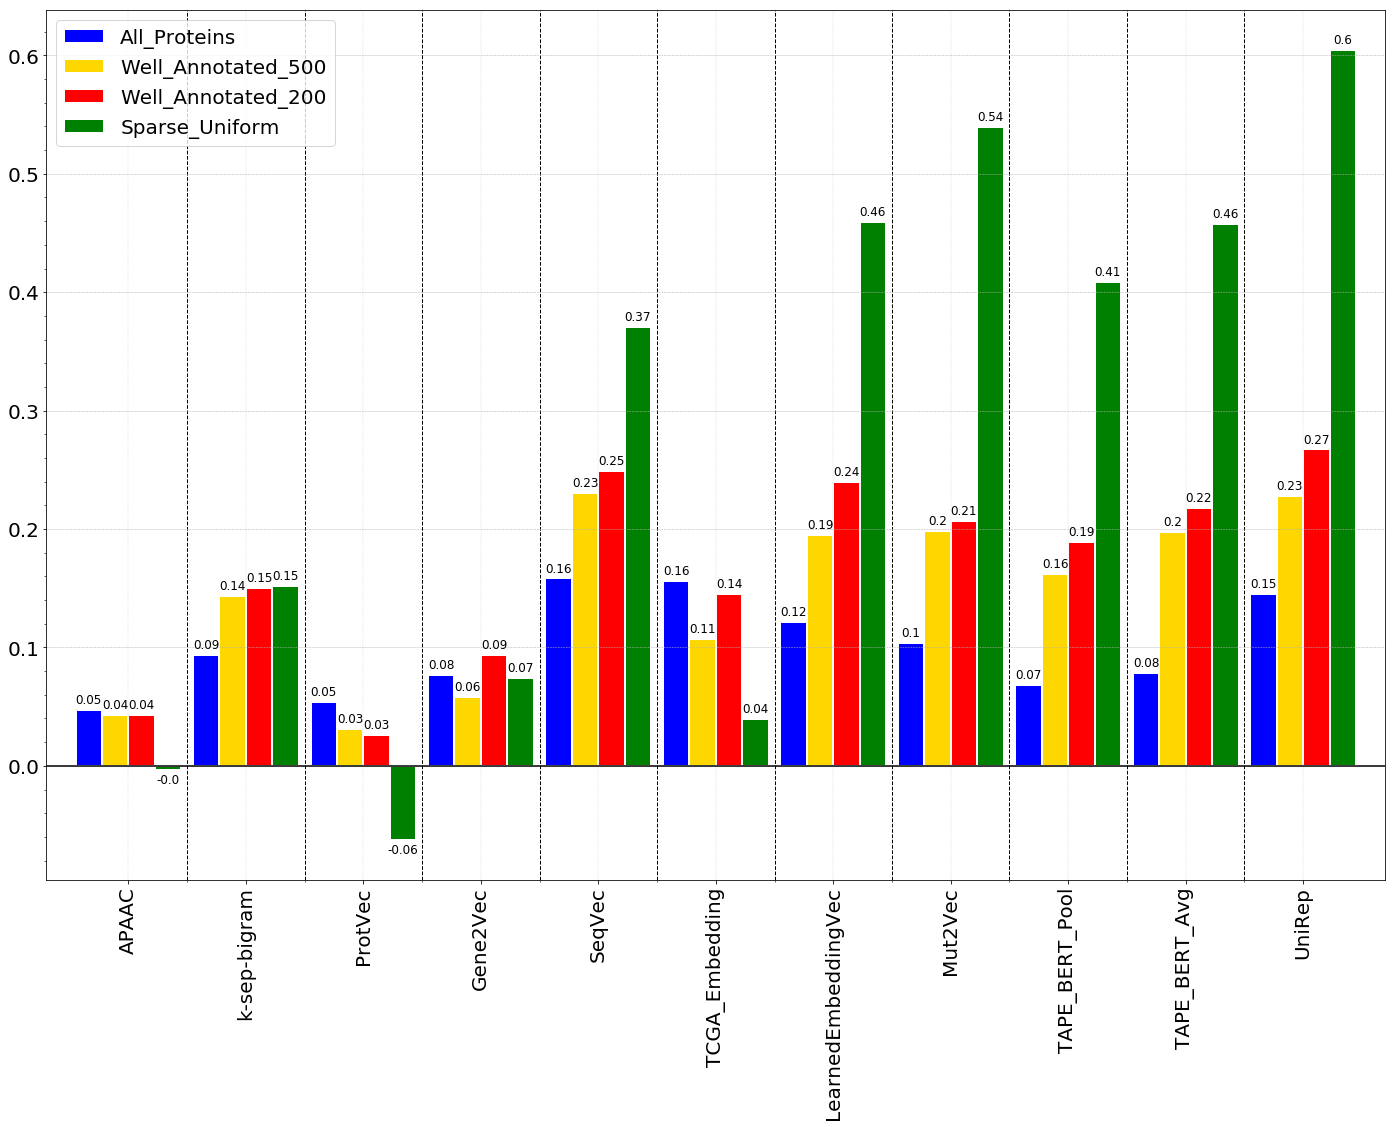

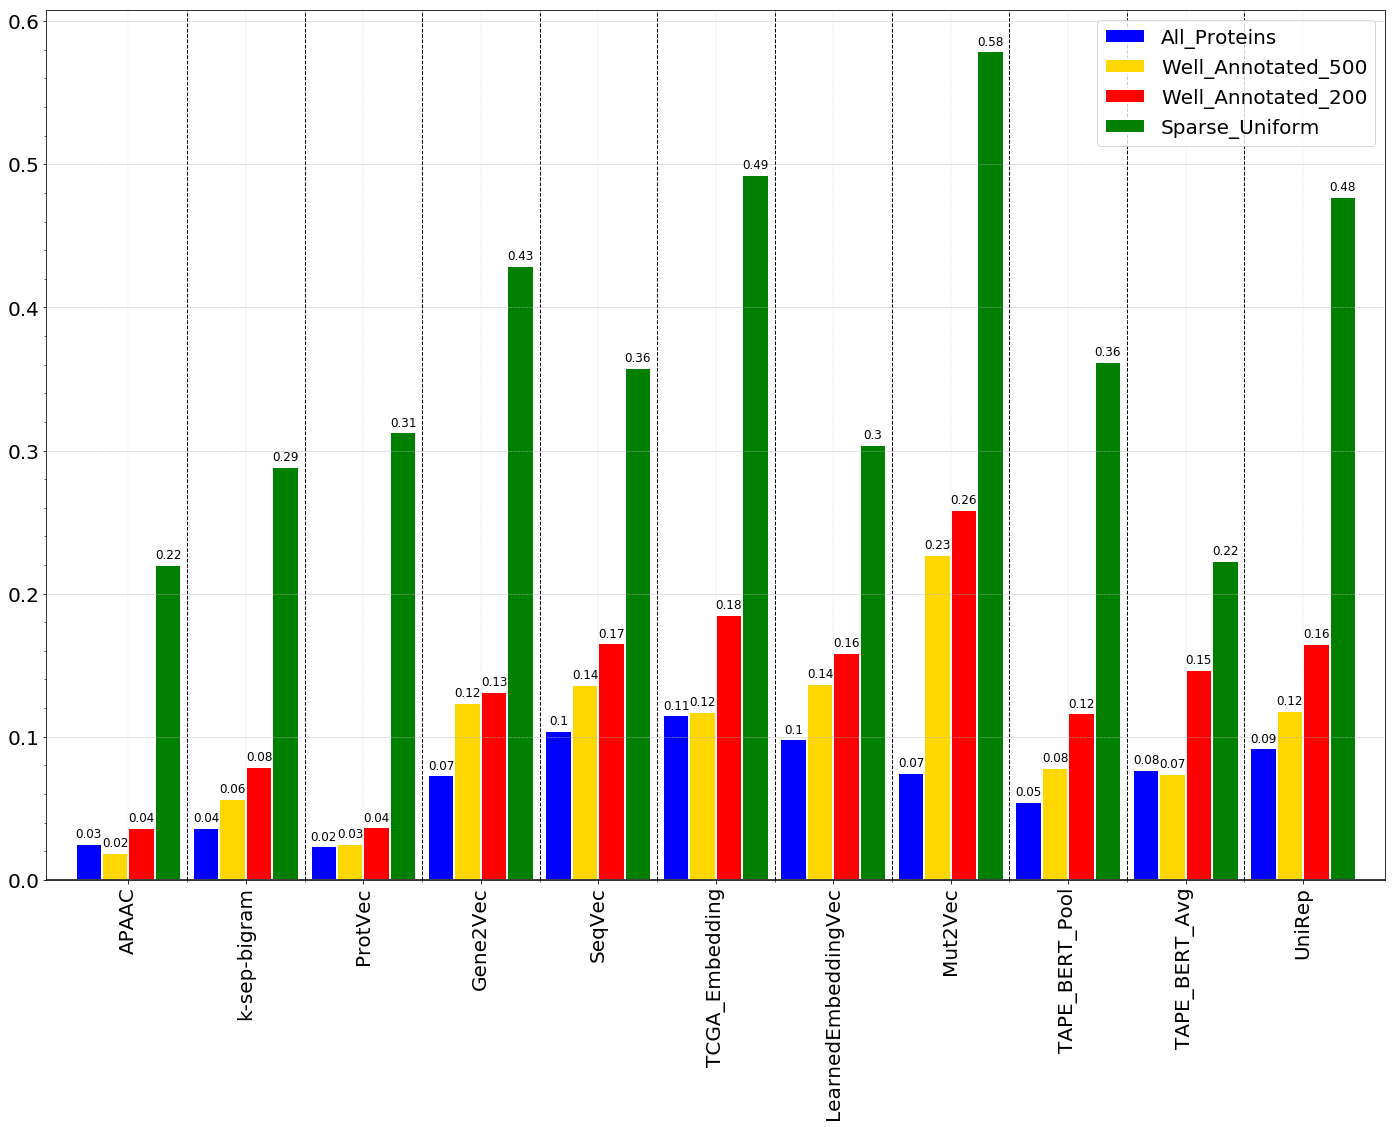

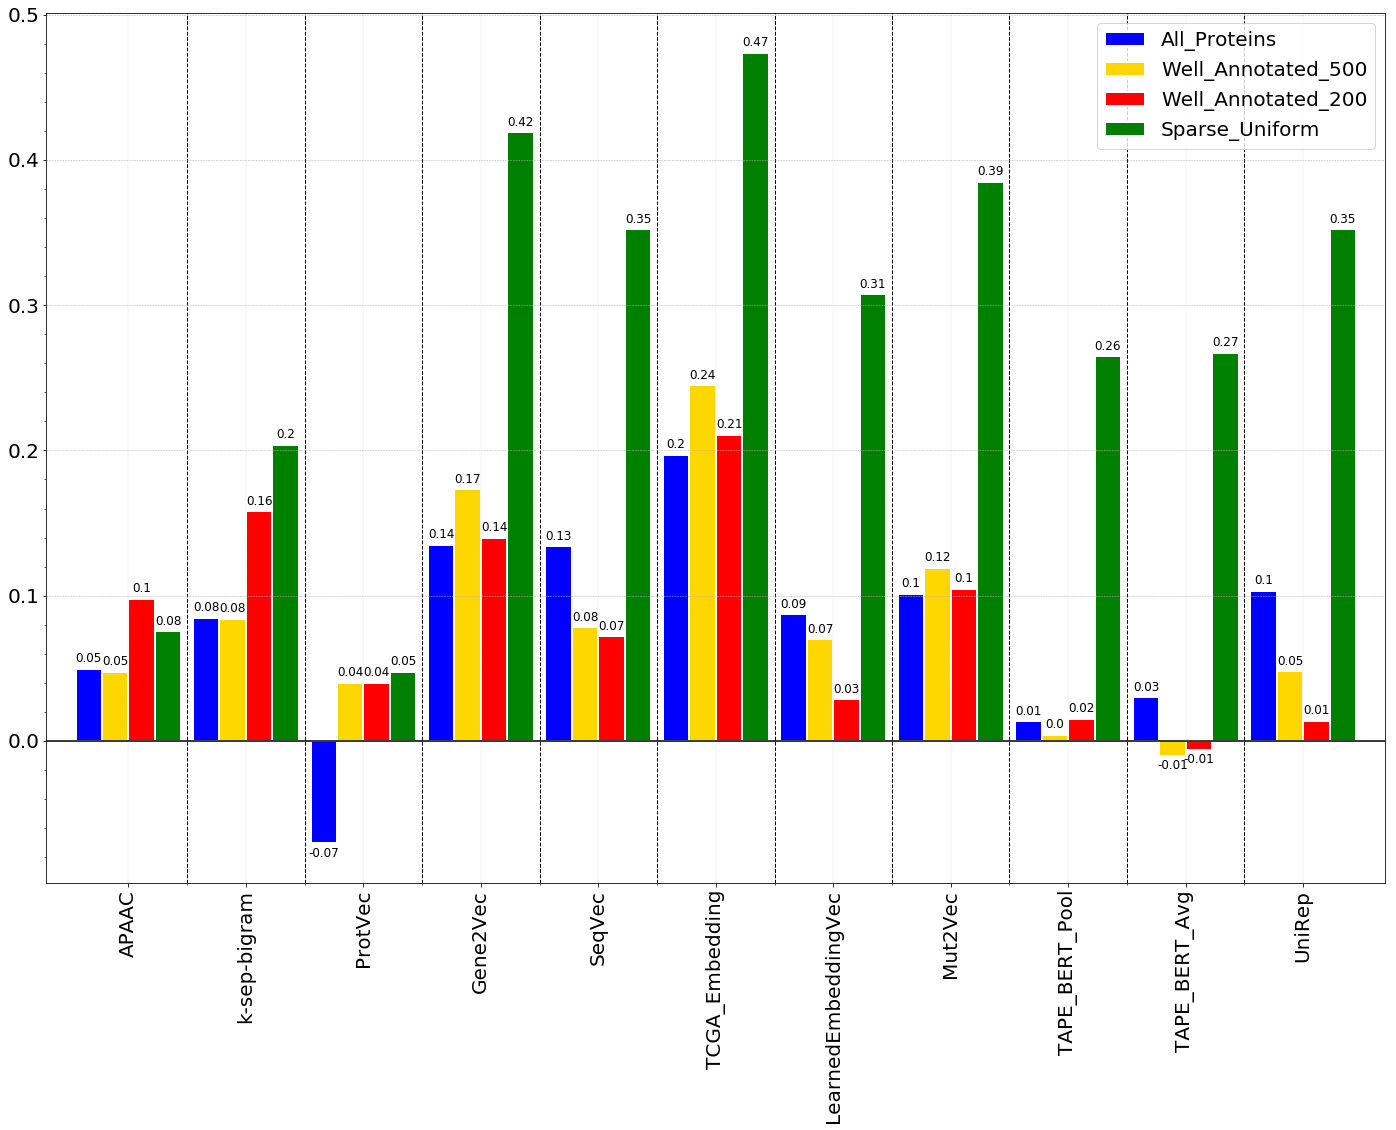

In [12]:
cosine_MF,cosine_BP,cosine_CC,embedding_lables = prepare_data_for_measure('cosineCorr')

drawBenchmarks(cosine_MF,embedding_lables,"a")
drawBenchmarks(cosine_BP,embedding_lables,"b")
drawBenchmarks(cosine_CC,embedding_lables,"c")

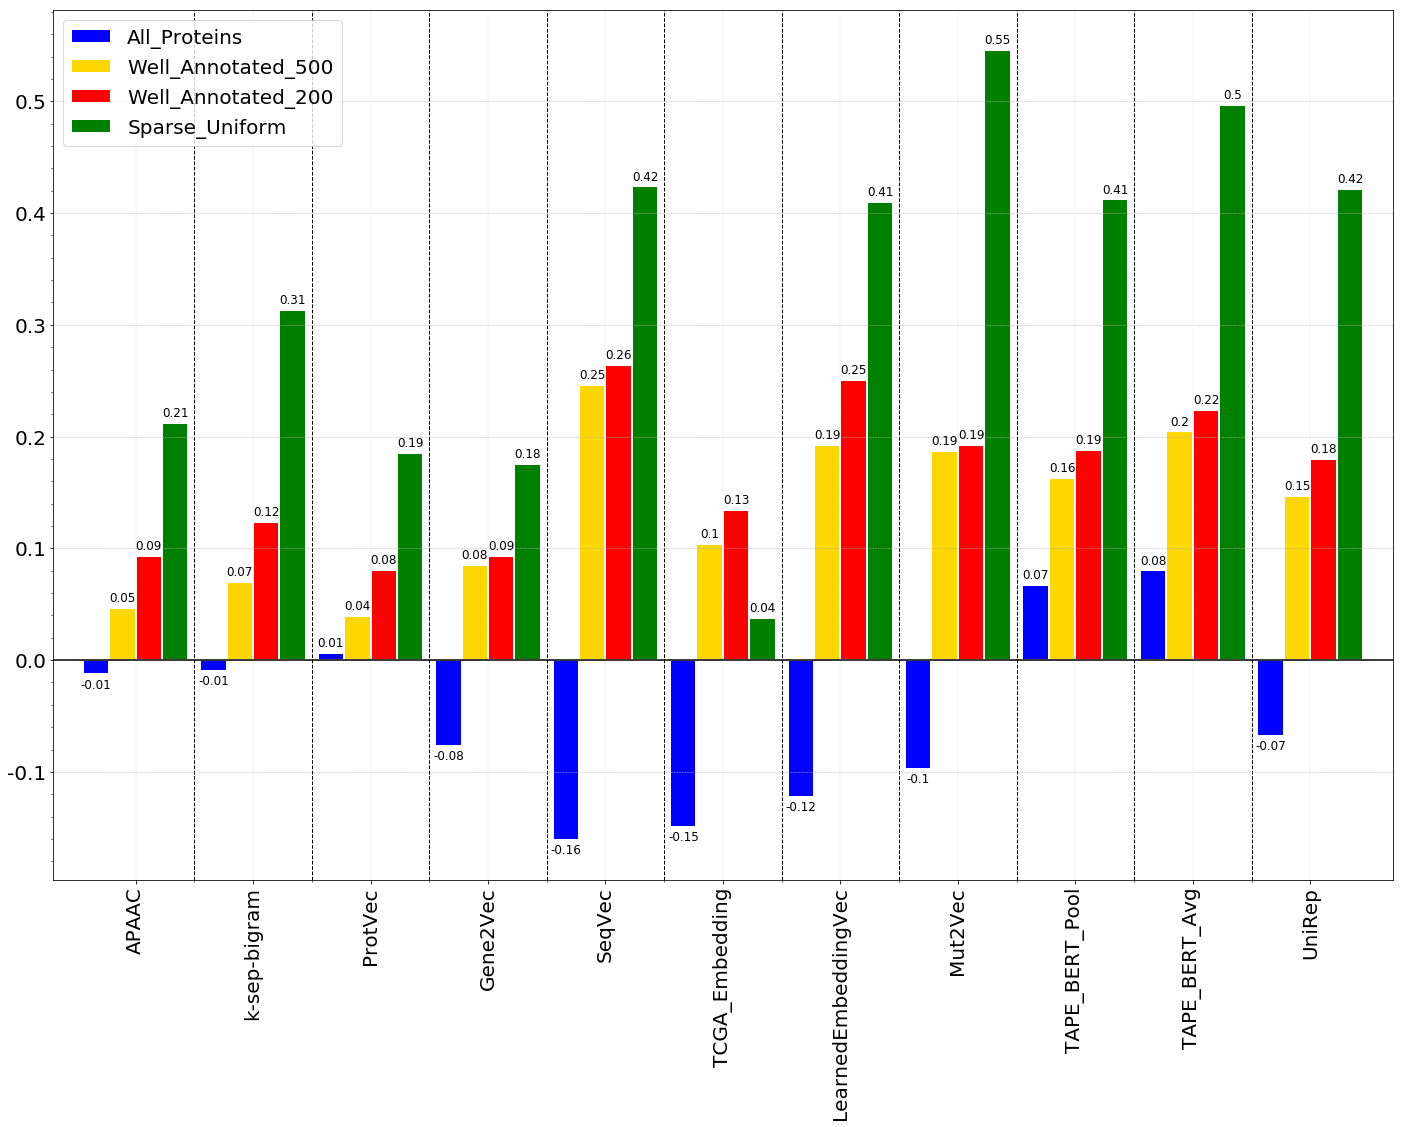

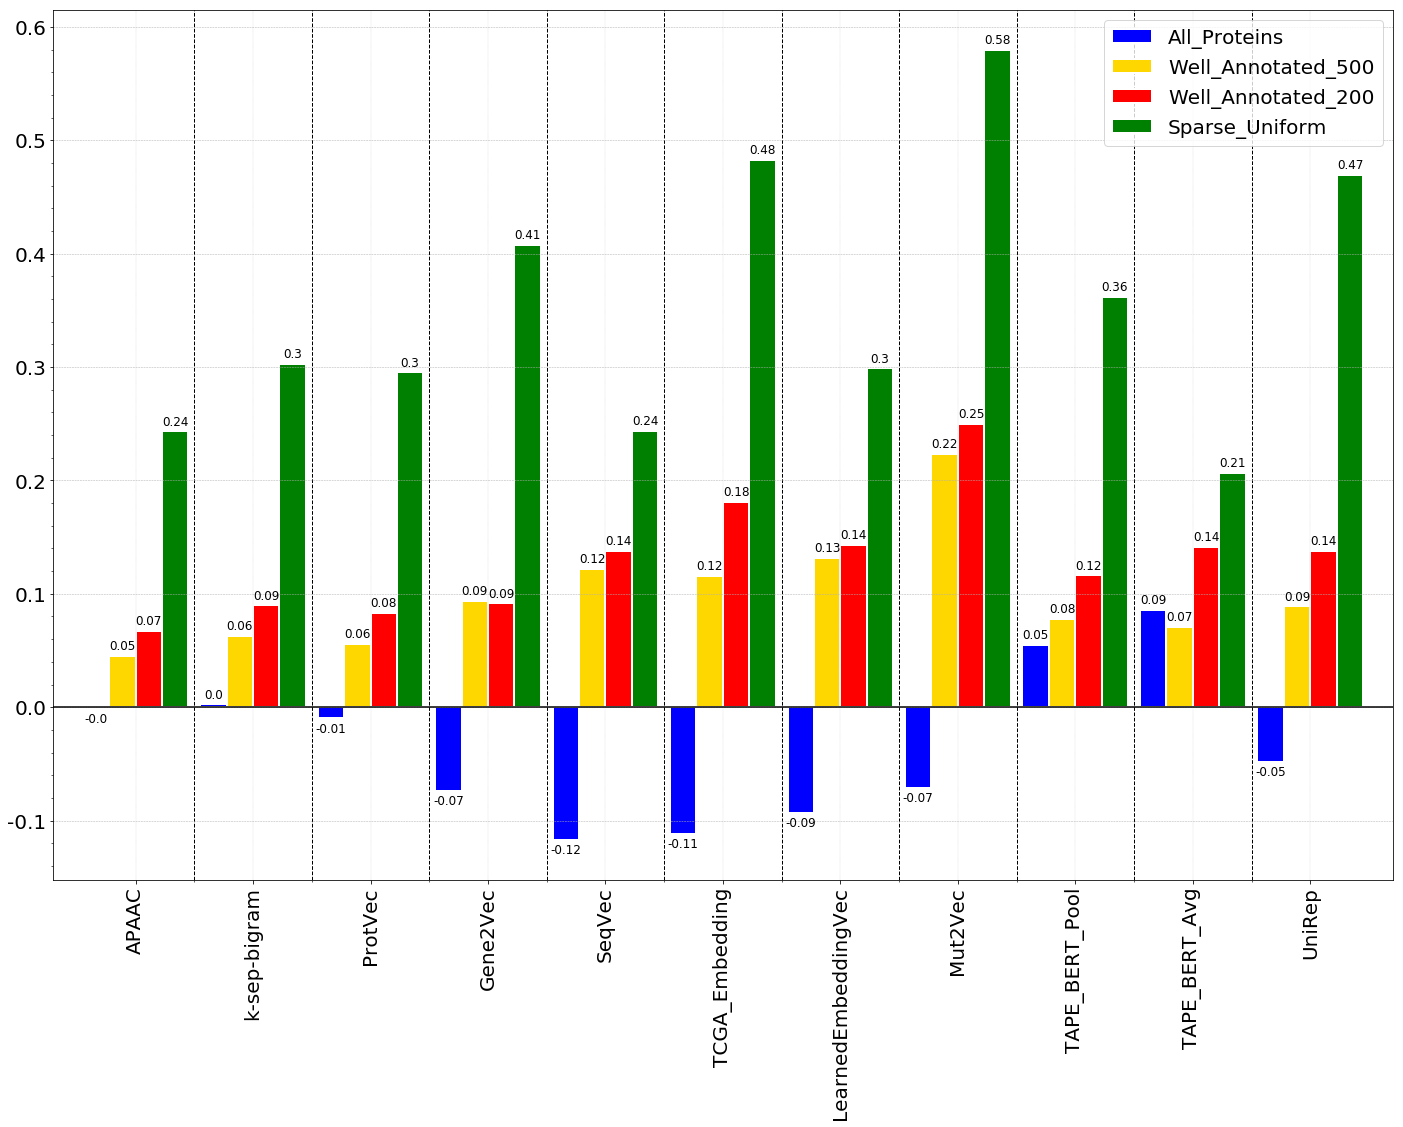

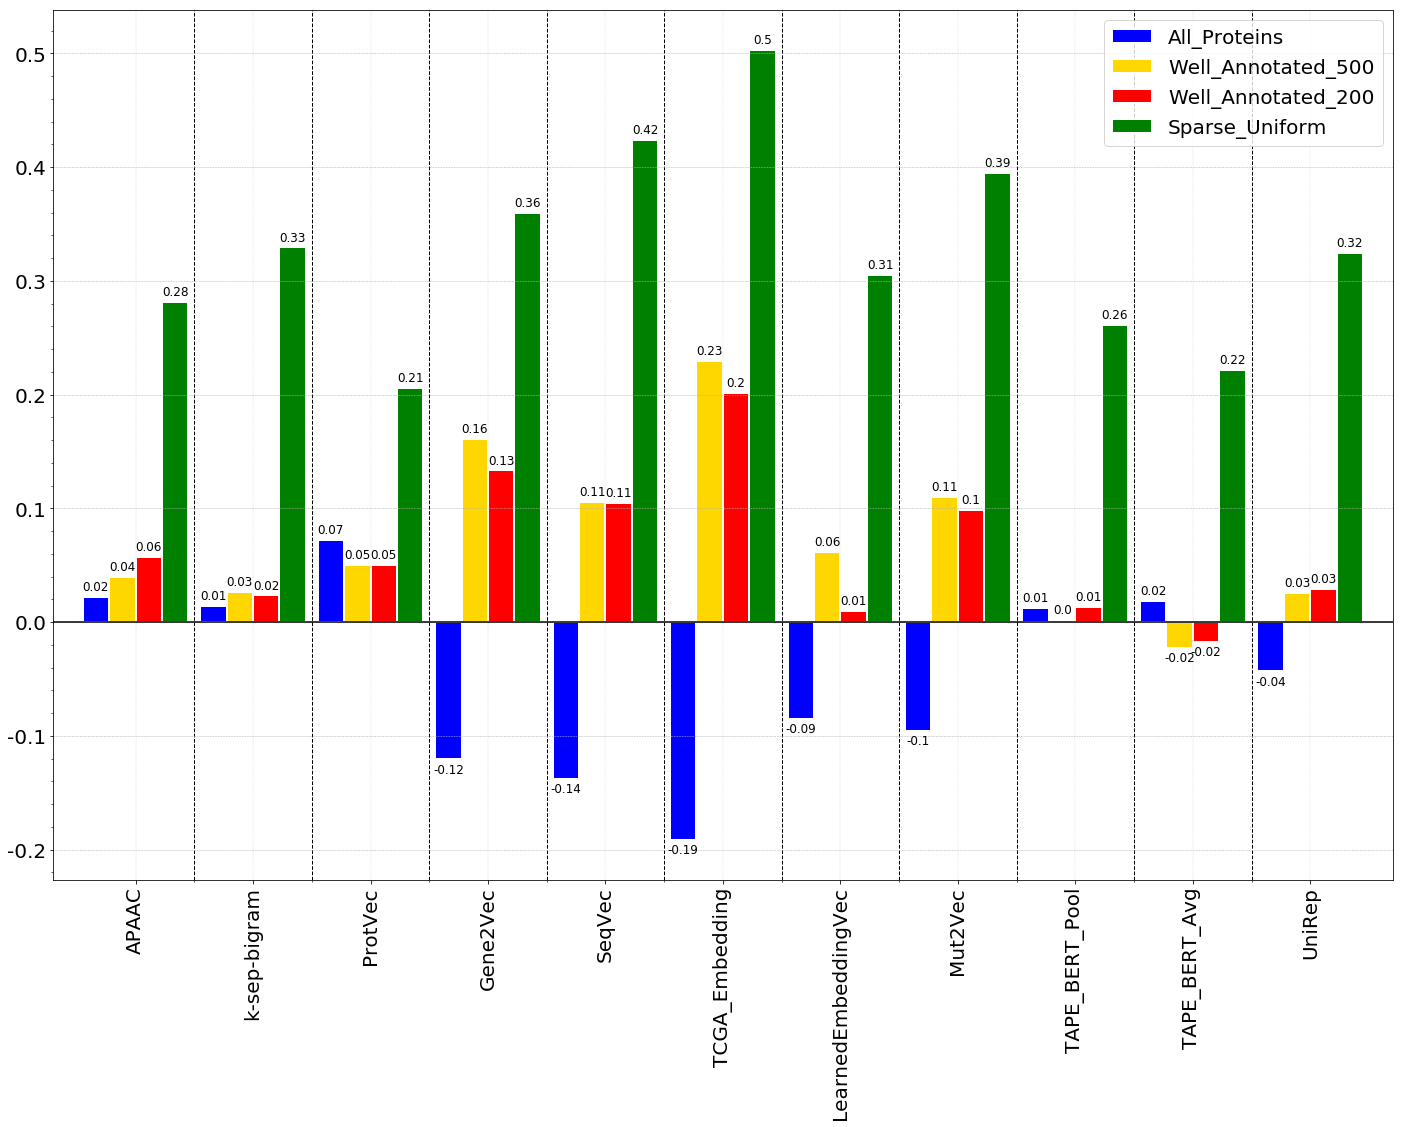

In [13]:
manhattan_MF,manhattan_BP,manhattan_CC,embedding_lables = prepare_data_for_measure('manhattanCorr')

drawBenchmarks(manhattan_MF,embedding_lables,"a")
drawBenchmarks(manhattan_BP,embedding_lables,"b")
drawBenchmarks(manhattan_CC,embedding_lables,"c")

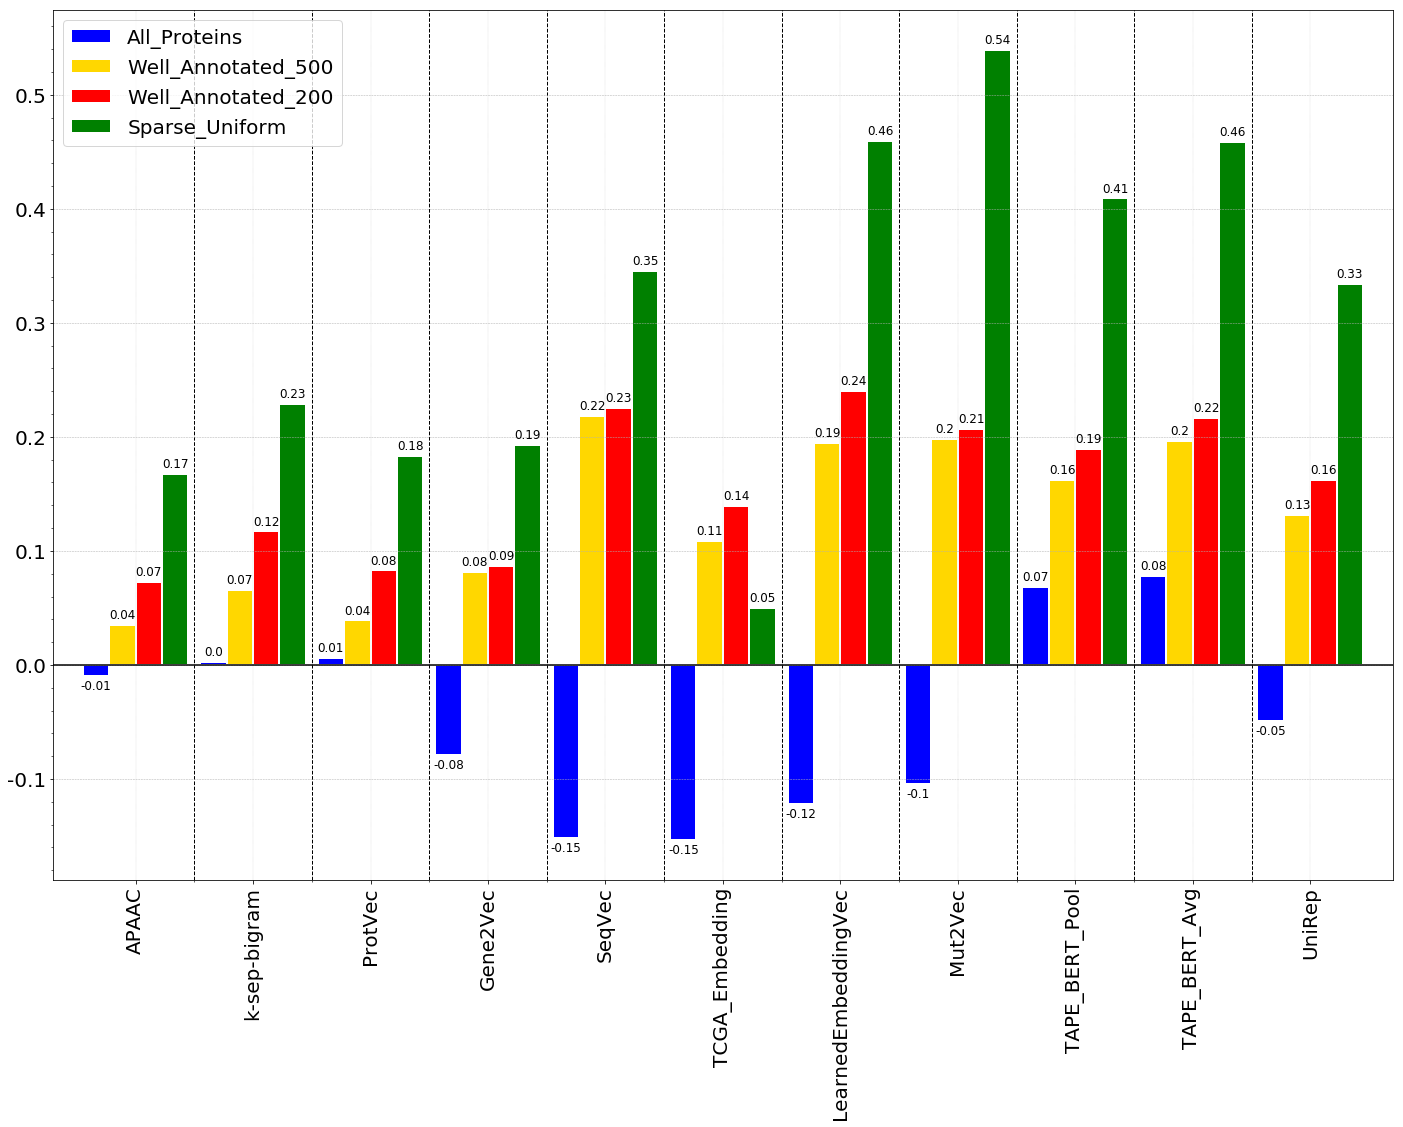

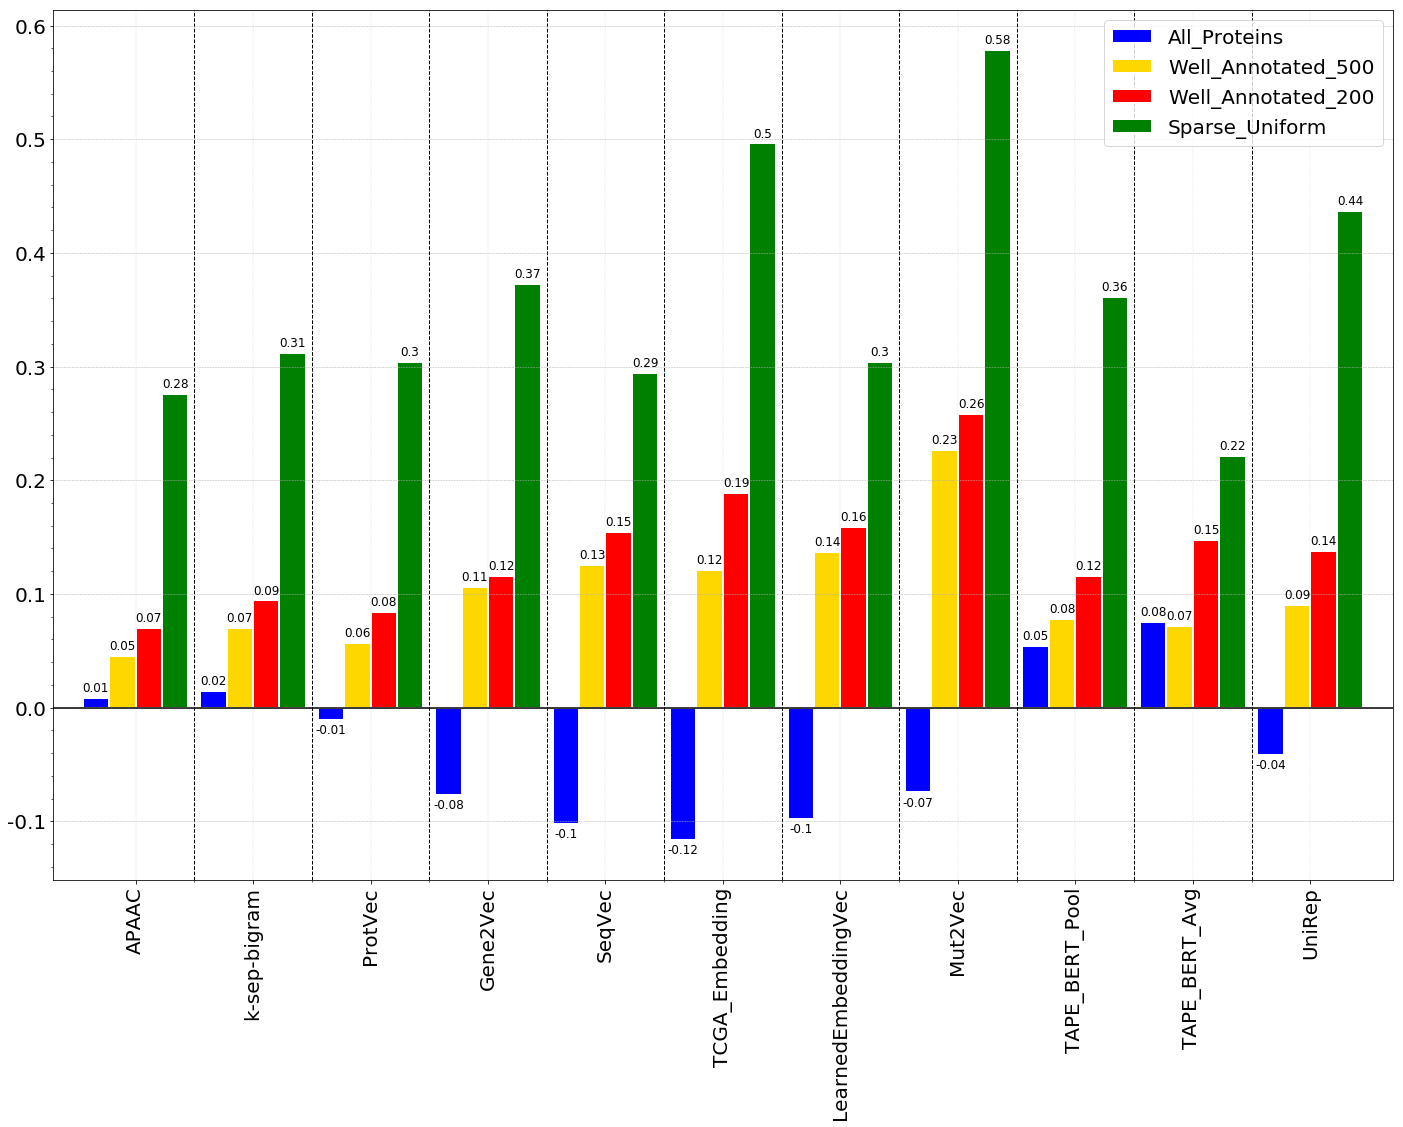

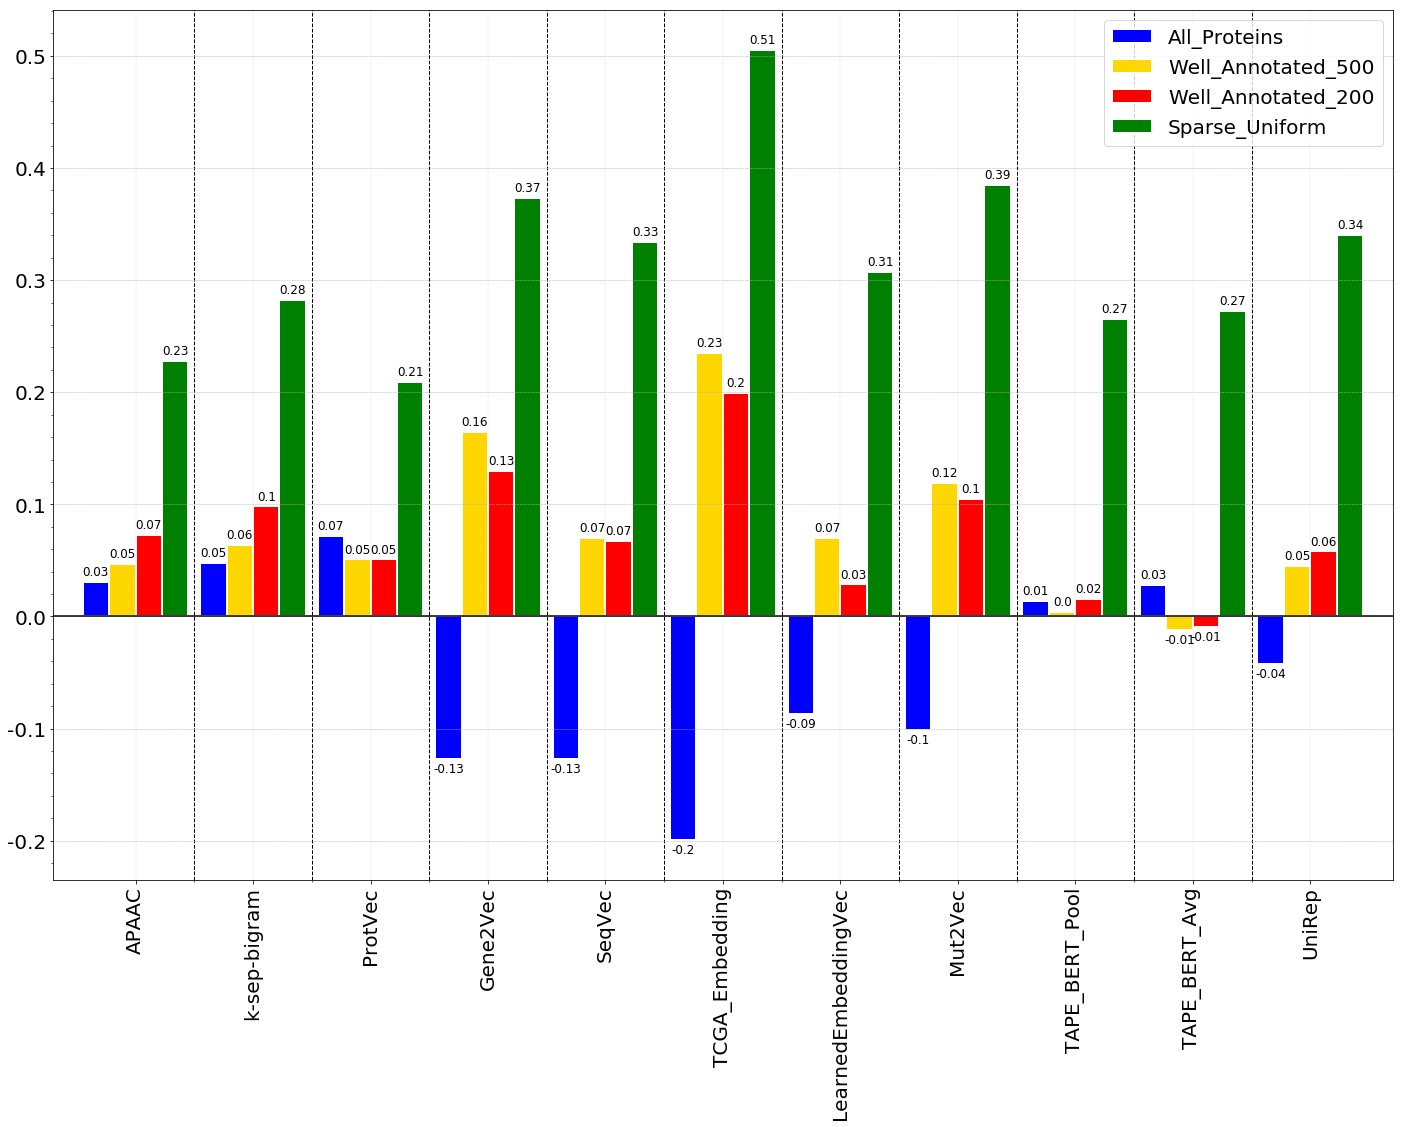

In [14]:
euclidian_MF,euclidian_BP,euclidian_CC,embedding_lables = prepare_data_for_measure('euclidianCorr')

drawBenchmarks(euclidian_MF,embedding_lables,"a")
drawBenchmarks(euclidian_BP,embedding_lables,"b")
drawBenchmarks(euclidian_CC,embedding_lables,"c")